In [39]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy import units as u
plt.ion()
import os

In [40]:
# finding the mean of an array
a = [23, 56, 2, 4, 3]
b = np.mean(a)
print(b)

17.6


In [41]:
# opening the fits file
hdu = fits.open("./hst_results_nd.fits")

In [42]:
# getting the header and the data from the fits file
hdr = hdu[0].header
data = hdu[0].data

In [43]:
print(hdr)

SIMPLE  =                    T / Standard FITS format                           BITPIX  =                    8 / Character data                                 NAXIS   =                    1 / Text string                                    NAXIS1  =                15419 / Number of characters                           VOTMETA =                    T / Table metadata in VOTable format               EXTEND  =                    T / There are standard extensions                  COMMENT                                                                         COMMENT The data in this primary HDU consists of bytes which                    COMMENT comprise a VOTABLE document.                                            COMMENT The VOTable describes the metadata of the table contained               COMMENT in the following BINTABLE extension.                                    COMMENT Such a BINTABLE extension can be used on its own as a perfectly         COMMENT good table, but the information 

In [53]:
# creating a table from the data
t = Table.read("./hst_results_nd.fits")
ra = t["RA"]
dec = t["DEC"]
av = t["Av_p50"]
age = t["logA_p50"]
mass = t["M_ini_p50"]
f475w = t["F475W_VEGA"]
f814w = t["F814W_VEGA"]
t[0].colnames

['Name',
 'RA',
 'DEC',
 'HST_WFC3_F225W',
 'HST_WFC3_F275W',
 'HST_WFC3_F336W',
 'HST_WFC3_F475W',
 'HST_WFC3_F814W',
 'HST_WFC3_F110W',
 'HST_WFC3_F160W',
 'Av_Best',
 'Av_Exp',
 'Av_p16',
 'Av_p50',
 'Av_p84',
 'Rv_Best',
 'Rv_Exp',
 'Rv_p16',
 'Rv_p50',
 'Rv_p84',
 'Rv_A_Best',
 'Rv_A_Exp',
 'Rv_A_p16',
 'Rv_A_p50',
 'Rv_A_p84',
 'f_A_Best',
 'f_A_Exp',
 'f_A_p16',
 'f_A_p50',
 'f_A_p84',
 'distance_Best',
 'distance_Exp',
 'distance_p16',
 'distance_p50',
 'distance_p84',
 'radius_Best',
 'radius_Exp',
 'radius_p16',
 'radius_p50',
 'radius_p84',
 'logL_Best',
 'logL_Exp',
 'logL_p16',
 'logL_p50',
 'logL_p84',
 'logg_Best',
 'logg_Exp',
 'logg_p16',
 'logg_p50',
 'logg_p84',
 'mbolmag_Best',
 'mbolmag_Exp',
 'mbolmag_p16',
 'mbolmag_p50',
 'mbolmag_p84',
 'logA_Best',
 'logA_Exp',
 'logA_p16',
 'logA_p50',
 'logA_p84',
 'logT_Best',
 'logT_Exp',
 'logT_p16',
 'logT_p50',
 'logT_p84',
 'M_ini_Best',
 'M_ini_Exp',
 'M_ini_p16',
 'M_ini_p50',
 'M_ini_p84',
 'M_act_Best',
 'M_act_Exp

44
170


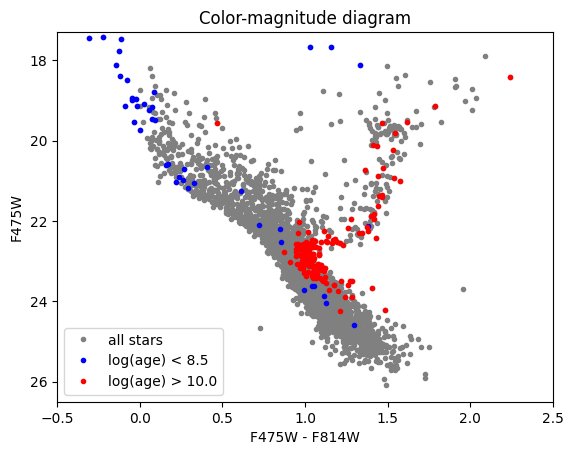

In [74]:
young_stars = t[age < 8.5]
old_stars = t[age > 10.0]
#print(old_stars[0:100])
print(len(young_stars))
print(len(old_stars))
plt.figure()
plt.plot(f475w-f814w, f475w, ls = "", color='gray', marker='.', label = 'all stars')
plt.ylim(26.5, 17.3)
plt.xlim(-0.5, 2.5)
plt.plot(young_stars["F475W_VEGA"]-young_stars["F814W_VEGA"],young_stars["F475W_VEGA"], ls="", color='blue', marker='.', label = 'log(age) < 8.5')
plt.plot(old_stars["F475W_VEGA"]-old_stars["F814W_VEGA"],old_stars["F475W_VEGA"], ls="", color='red', marker='.', label = 'log(age) > 10.0')
plt.xlabel("F475W - F814W")
plt.ylabel("F475W")
plt.title("Color-magnitude diagram")
plt.legend()
plt.savefig("cmd_by_age.pdf")

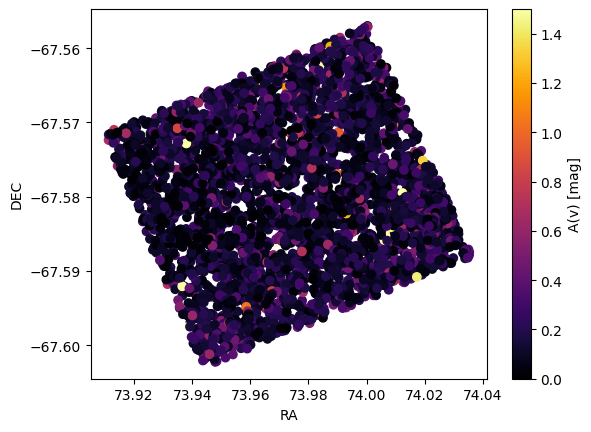

In [45]:
plt.figure()
#plt.plot(ra,dec, 'r.', ls='')
# Av max = 5 ---> limit Av to 1.5
cb = plt.scatter(ra, dec, c=av, marker = 'o', cmap='inferno', vmin = 0, vmax = 1.5)
plt.xlabel("RA")
plt.ylabel("DEC")
plt.colorbar(cb, label="A(v) [mag]")
plt.savefig("lmc_av_spatial.pdf")

In [46]:
dist = t["distance_p50"]

49.806221103883765


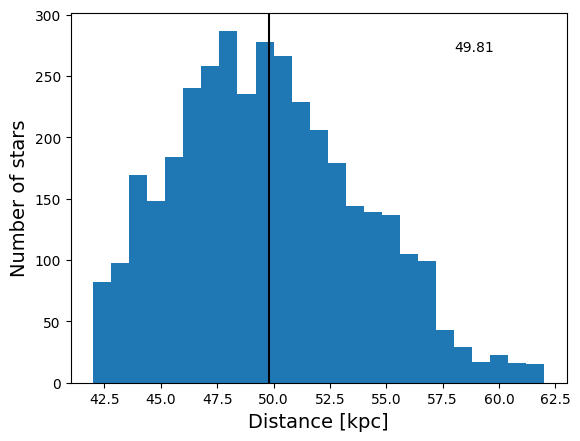

In [47]:
plt.figure()
plt.hist(dist/1000, bins = 25)
plt.xlabel("Distance [kpc]", fontsize = 14)
plt.ylabel("Number of stars", fontsize = 14)
d_mean = np.mean(dist/1000)
print(d_mean)
plt.axvline(d_mean, c = "k")
plt.text(58, 270, '%s' % np.around(d_mean, decimals = 2))
plt.savefig("lmc_hist_distance.pdf")

In [48]:
# read data from HST for the lmc_04 field
cat = Table.read("./hlsp_scylla_hst_wfc3_lmc-04_multi_v1_st.fits")

In [49]:
# get values of the magnitude for two filters
cat[0].colnames
f475 = cat["F475W_VEGA"]
f814 = cat["F814W_VEGA"]

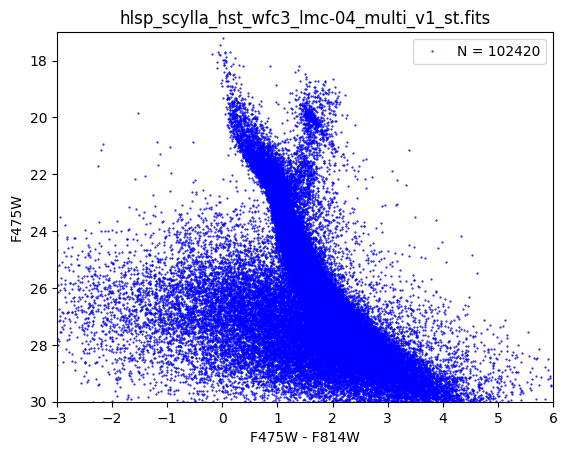

In [52]:
# generate the color-magniture diagram for the two filters
col = f475 - f814
mag = f475
f = "hlsp_scylla_hst_wfc3_lmc-04_multi_v1_st.fits"
n = len(f475)

plt.figure()
plt.plot(col, mag, '.b', markersize = 1, ls=' ', label='N = %s' % n)

plt.legend()
plt.xlim(-3,6)
plt.ylim(30,17)
plt.xlabel("F475W - F814W")
plt.ylabel("F475W")
plt.title("%s" % f)
plt.savefig("cmd_lmc_04.pdf")